<a href="https://colab.research.google.com/github/nishant-harinkhede12/NLP-and-Deep-Learing/blob/main/ANN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
url = 'https://raw.githubusercontent.com/nishant-harinkhede12/NLP-and-Deep-Learing/main/Churn_Modelling.csv'

import pandas as pd
#dataset = pd.read_csv(url, header=None, sep=',')
#dataset = pd.read_csv(url, skiprows=2, dtype=str, header=None)
dataset = pd.read_csv(url)#,delimiter=",")#, names=column_names
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Import library

In [4]:
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2.8.2


Divide data into independent and target 

In [5]:
from tensorflow.python import data
# x = dataset.iloc[:,3:13].values
# y = dataset.iloc[:,13].values
# print(x)
# print(y)

feature engineering

In [6]:
# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()

# LE.fit_transform(x[:,1])
# x[:,1] = LE.fit_transform(x[:,1]) 
# LE.fit_transform(x[:,2])
# x[:,2] = LE.fit_transform(x[:,2]) 

# print(x,y)


OR

In [7]:
from tensorflow.python import data
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

Feature engieering Geography Gender

In [8]:
geography = pd.get_dummies(x['Geography'],drop_first=True)

# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()
# gender = LE.fit_transform(x['Gender'])

gender = pd.get_dummies(x['Gender'],drop_first=True)

In [9]:
x= x.drop(['Geography','Gender'], axis =1)
x = pd.concat([x,geography,gender], axis =1)
print(x)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1   

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print (X_train)
print (X_train.shape)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
(8000, 11)


PART 2 to create ANN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [42]:
# lets initilize ANN
classifier = Sequential()

# add input layer
classifier.add(Dense(units=11, activation = 'relu'))
classifier.add(Dropout(0.3))

# add first hidden layer
classifier.add(Dense(units=7, activation = 'relu'))

classifier.add(Dense(units=6, activation = 'relu'))

# adding output layer
classifier.add(Dense(1, activation = 'sigmoid')) # as output is binory

In [43]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics= ['accuracy'])
# import tensorflow.keras
# classifier.compile(
# optimizer= opt,#keras.optimizers.Adam(), 
# loss= keras.losses.SparseCategoricalCrossentropy(from_logits= True), 
# metrices= ['accuracy'])

In [44]:
# early stopping
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [45]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.3,batch_size =10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
560/560 [==============================] - 3s 4ms/step - loss: 0.4486 - accuracy: 0.8086 - val_loss: 0.3930 - val_accuracy: 0.8279
Epoch 2/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3997 - accuracy: 0.8230 - val_loss: 0.3992 - val_accuracy: 0.8300
Epoch 3/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3900 - accuracy: 0.8305 - val_loss: 0.3880 - val_accuracy: 0.8271
Epoch 4/1000
560/560 [==============================] - 2s 4ms/step - loss: 0.3755 - accuracy: 0.8375 - val_loss: 0.3818 - val_accuracy: 0.8467
Epoch 5/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3759 - accuracy: 0.8407 - val_loss: 0.3745 - val_accuracy: 0.8379
Epoch 6/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3721 - accuracy: 0.8423 - val_loss: 0.3875 - val_accuracy: 0.8408
Epoch 7/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3698 - accuracy: 0.8452 - val_loss: 0.3795 - val_accuracy:

In [46]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


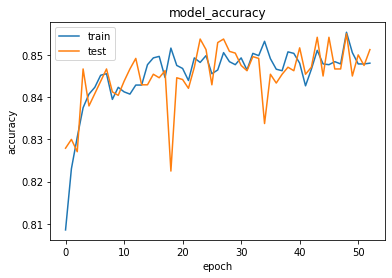

In [47]:
# summrize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper_left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


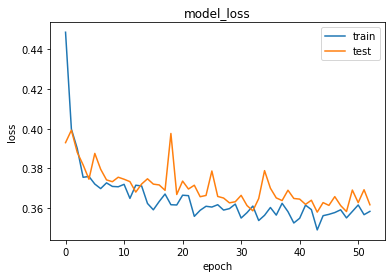

In [48]:
# summrize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper_left')
plt.show()

prediction

In [49]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print("accuracy score of svc = ",ac)

[[1538   57]
 [ 222  183]]
accuracy score of svc =  0.8605


In [50]:
# get the weights

classifier.get_weights()

[array([[ 0.05191249, -0.42743573,  0.19901995,  0.01094169, -0.2038493 ,
         -0.36483264,  0.03882722,  0.2864147 ,  0.6240756 , -0.19109444,
         -0.3592477 ],
        [-3.7435806 ,  2.224352  ,  2.3426716 ,  2.505599  ,  1.2595793 ,
          1.0174383 ,  1.408745  , -2.5758324 , -1.9637614 ,  2.1356938 ,
          1.0818316 ],
        [-0.04768772, -0.46485963, -0.30144328,  0.3406908 ,  0.33617106,
         -0.0976109 ,  0.27725995,  0.5433739 ,  0.994456  , -0.15693378,
          0.24495079],
        [-1.2082136 , -1.2363789 ,  1.7949102 , -0.33015418, -2.765941  ,
         -2.8530486 ,  0.6502065 , -3.0645769 , -2.005545  ,  0.28340927,
          1.2120824 ],
        [ 0.1125607 , -3.8281627 ,  0.576597  , -0.06077242, -3.5992231 ,
         -3.3202934 ,  3.7151344 ,  0.7102347 ,  0.30375057, -0.37179416,
          3.7643993 ],
        [ 0.32321578,  0.06185843,  0.40019876, -0.28968373,  0.40668273,
         -0.02352772, -0.03950441, -0.32986987, -0.12323266,  0.0200784